In [26]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '1bd74987-2848-4962-8e08-2727fbeb9c42',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2025-01-08T13:41:41.288Z', 'error_code': 0, 'error_message': None, 'elapsed': 11, 'credit_count': 1, 'notice': None, 'total_count': 10554}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11857, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [5]:
type(data)

dict

In [27]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [28]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11857,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.980733e+07,1.980733e+07,False,NaN,1,None,None,None,2025-01-08T13:39:00.000Z,95319.466823,6.906427e+10,39.7296,0.160764,-5.362641,1.824040,-3.646907,24.796753,56.519965,1.888024e+12,56.6751,2.001709e+12,None,2025-01-08T13:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-08 14:41:50.102005
1,1027,Ethereum,ETH,ethereum,9807,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.204772e+08,1.204772e+08,True,NaN,2,None,None,None,2025-01-08T13:40:00.000Z,3355.846488,3.916292e+10,81.9761,0.173837,-7.738619,0.785817,-13.595606,10.090687,40.874929,4.043028e+11,12.1421,4.043028e+11,None,2025-01-08T13:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-08 14:41:50.102005
2,825,Tether USDt,USDT,tether,111909,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.375200e+11,1.414371e+11,True,NaN,3,None,None,None,2025-01-08T13:40:00.000Z,0.999699,1.528769e+11,47.8397,0.007228,-0.032314,0.176123,0.005296,-0.037322,0.067678,1.374786e+11,4.1269,1.413945e+11,None,2025-01-08T13:40:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-01-08 14:41:50.102005
3,52,XRP,XRP,xrp,1497,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.744905e+10,9.998671e+10,False,NaN,4,None,None,None,2025-01-08T13:40:00.000Z,2.326709,9.236872e+09,103.5882,-0.286326,-4.015787,7.669879,-4.651788,324.342934,331.367347,1.336672e+11,4.0143,2.326709e+11,None,2025-01-08T13:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-08 14:41:50.102005
4,1839,BNB,BNB,bnb,2329,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.440065e+08,1.440065e+08,False,NaN,5,None,None,None,2025-01-08T13:40:00.000Z,695.371915,2.413819e+09,15.6543,-0.171285,-4.044016,-1.769698,-4.516106,11.334410,23.012099,1.001381e+11,3.0074,1.001381e+11,None,2025-01-08T13:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-08 14:41:50.102005
5,5426,Solana,SOL,solana,819,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.836562e+08,5.917363e+08,True,NaN,6,None,None,None,2025-01-08T13:40:00.000Z,196.994736,5.717803e+09,72.7211,0.660129,-7.953394,3.927276,-14.029928,-1.745196,41.971967,9.527772e+10,2.8614,1.165689e+11,None,2025-01-08T13:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-08 14:41:50.102005
6,74,Dogecoin,DOGE,dogecoin,1142,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.475381e+11,1.475381e+11,True,NaN,7,None,None,None,2025-01-08T13:40:00.000Z,0.347641,5.820508e+09,87.6750,0.780093,-9.998362,9.680459,-21.096476,68.185255,228.101438,5.129034e+10,1.5396,5.129034e+10,None,2025-01-08T13:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-08 14:41:50.102005
7,3408,USDC,USDC,usd-coin,24537,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.539931e+10,4.539931e+10,False,NaN,8,None,None,None,2025-01-08T13:40:00.000Z,1.000047,1.087483e+10,42.6739,0.014160,-0.002298,0.017290,0.013337,0.045433,0.020436,4.540144e+10,1.3635,4.540144e+10,None,2025-01-08T13:40:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-01-08 14:41:50.102005
8,2010,Cardano,ADA,cardano,1428,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract.

In [41]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    
    parameters = {'start':'1', 'limit':'15', 'convert':'USD'}

    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '1bd74987-2848-4962-8e08-2727fbeb9c42',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data
    
    # Use to keep it in a dataframe
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df

    if not os.path.isfile(r'C:\Users\USER\Documents\Data Analyst Portfolio Project\Phyton\API.csv'):
        df.to_csv(r'C:\Users\USER\Documents\Data Analyst Portfolio Project\Phyton\API.csv', header='column_names')
    else:
        df.to_csv(r'C:\Users\USER\Documents\Data Analyst Portfolio Project\Phyton\API.csv', mode='a', header=False)

In [60]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

In [ ]:
df72 = pd.read_csv(r'C:\Users\USER\Documents\Data Analyst Portfolio Project\Phyton\API.csv')
df72

In [38]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11857,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.980733e+07,1.980733e+07,False,NaN,1,None,None,None,2025-01-08T13:57:00.000Z,95341.787356,6.930205e+10,40.0125,0.499569,-5.273808,1.722587,-3.697309,24.655944,56.432756,1.888466e+12,56.6876,2.002178e+12,None,2025-01-08T13:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-08 14:58:34.943565
1,1027,Ethereum,ETH,ethereum,9807,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.204772e+08,1.204772e+08,True,NaN,2,None,None,None,2025-01-08T13:58:00.000Z,3360.443100,3.927078e+10,82.8608,0.630437,-7.523427,0.744474,-13.810177,10.277982,40.921248,4.048566e+11,12.1592,4.048566e+11,None,2025-01-08T13:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-08 14:58:34.943565
2,825,Tether USDt,USDT,tether,111911,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.375200e+11,1.414371e+11,True,NaN,3,None,None,None,2025-01-08T13:58:00.000Z,0.999778,1.531956e+11,48.0443,0.012359,-0.017537,0.192674,0.000572,-0.047157,0.094374,1.374895e+11,4.1271,1.414056e+11,None,2025-01-08T13:58:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-01-08 14:58:34.943565
3,52,XRP,XRP,xrp,1497,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.744905e+10,9.998671e+10,False,NaN,4,None,None,None,2025-01-08T13:58:00.000Z,2.318072,9.241958e+09,102.7510,0.127741,-4.378573,7.376811,-4.680760,321.935457,332.186783,1.331711e+11,3.9996,2.318072e+11,None,2025-01-08T13:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-08 14:58:34.943565
4,1839,BNB,BNB,bnb,2329,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.440065e+08,1.440065e+08,False,NaN,5,None,None,None,2025-01-08T13:58:00.000Z,696.400484,2.418136e+09,16.0833,0.376498,-3.848762,-1.668565,-4.536430,11.491782,23.301166,1.002862e+11,3.0119,1.002862e+11,None,2025-01-08T13:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-08 14:58:34.943565
5,5426,Solana,SOL,solana,819,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.836559e+08,5.917361e+08,True,NaN,6,None,None,None,2025-01-08T13:58:00.000Z,197.169623,5.729658e+09,74.7463,1.032172,-7.770475,3.910052,-13.961227,-1.518124,42.797961,9.536225e+10,2.8640,1.166724e+11,None,2025-01-08T13:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-08 14:58:34.943565
6,74,Dogecoin,DOGE,dogecoin,1142,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.475384e+11,1.475384e+11,True,NaN,7,None,None,None,2025-01-08T13:58:00.000Z,0.346613,5.828981e+09,87.7433,1.247234,-10.227638,9.314022,-21.437854,68.048196,227.993272,5.113880e+10,1.5351,5.113880e+10,None,2025-01-08T13:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-08 14:58:34.943565
7,3408,USDC,USDC,usd-coin,24537,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.541412e+10,4.541412e+10,False,NaN,8,None,None,None,2025-01-08T13:58:00.000Z,1.000061,1.090069e+10,43.0763,0.009969,0.004555,0.012231,0.004836,0.028487,0.019387,4.541689e+10,1.3640,4.541689e+10,None,2025-01-08T13:58:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-01-08 14:58:34.943565
8,2010,Cardano,ADA,cardano,1428,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...

In [61]:
# To see the numbers in this case

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [45]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11857,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19807343.00000,19807343.00000,False,NaN,1,None,None,None,2025-01-08T14:12:00.000Z,95277.31872,69472585714.39488,41.40450,0.05023,-5.35086,1.29144,-3.86106,24.81201,56.58431,1887190532045.89355,56.49510,2000823693160.85010,None,2025-01-08T14:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-08 15:13:18.117307
1,1027,Ethereum,ETH,ethereum,9807,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120477156.73077,120477156.73077,True,NaN,2,None,None,None,2025-01-08T14:12:00.000Z,3353.92850,39508477666.77306,85.63460,0.01362,-7.72977,0.33428,-13.81240,10.21343,41.02006,404071769678.87128,12.11210,404071769678.87000,None,2025-01-08T14:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-08 15:13:18.117307
2,825,Tether USDt,USDT,tether,111911,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,137520044570.03809,141437091599.89670,True,NaN,3,None,None,None,2025-01-08T14:12:00.000Z,0.99969,153733257790.27100,49.09580,-0.01843,-0.02632,0.16907,-0.02303,-0.05966,0.07970,137477120060.68314,4.11550,141392944451.89001,None,2025-01-08T14:12:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-01-08 15:13:18.117307
3,52,XRP,XRP,xrp,1497,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,57449049415.00000,99986708632.00000,False,NaN,4,None,None,None,2025-01-08T14:12:00.000Z,2.32532,9251424229.45922,103.70930,-0.01996,-4.60622,6.81368,-4.23826,324.36933,335.82032,133587516919.98181,4.00430,232532162464.47000,None,2025-01-08T14:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-08 15:13:18.117307
4,1839,BNB,BNB,bnb,2329,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,144006488.51000,144006488.51000,False,NaN,5,None,None,None,2025-01-08T14:12:00.000Z,696.37958,2421347895.08186,16.11760,0.00238,-3.97603,-1.61916,-4.38769,12.16491,23.39286,100283178218.16951,3.00600,100283178218.17000,None,2025-01-08T14:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-08 15:13:18.117307
5,5426,Solana,SOL,solana,819,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,483655605.34089,591735770.46670,True,NaN,6,None,None,None,2025-01-08T14:12:00.000Z,197.37239,5730542132.06376,76.80220,0.33781,-7.77377,3.64144,-13.93817,-0.78985,43.49487,95460264288.58397,2.86140,116792305131.97000,None,2025-01-08T14:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-08 15:13:18.117307
6,74,Dogecoin,DOGE,dogecoin,1142,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,147538696383.70520,147538696383.70520,True,NaN,7,None,None,None,2025-01-08T14:12:00.000Z,0.34791,5832369839.64554,88.57760,0.74075,-10.13558,9.19228,-21.04214,69.51040,229.66158,51330270705.85849,1.53660,51330270705.86000,None,2025-01-08T14:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-08 15:13:18.117307
7,3408,USDC,USDC,usd-coin,24537,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,45415633415.93269,45415633415.93269,False,NaN,8,None,None,None,2025-01-08T14:12:00.000Z,0.99992,10905304394.43224,43.97660,-0.02294,-0.00405,-0.00919,-0.01085,0.01440,0.00147,45411906201.35106,1.36120,45411906201.35000,None,2025-01-08T14:12:00.000Z,1027.00000,Ethereum,ETH,ethereu

In [62]:
# Now let's look at the coin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.27258,-5.48509,1.12519,-4.91813,24.48397,56.92016
Ethereum,0.04368,-7.15839,0.60405,-14.50471,10.89433,41.24760
Tether USDt,0.00383,-0.01146,0.13008,-0.02379,-0.05566,0.06315
XRP,0.02351,-4.46390,6.96026,-4.90817,324.49641,335.70268
BNB,0.03872,-3.66767,-1.53397,-4.71030,12.61723,23.52476
Solana,0.36633,-7.18879,3.94365,-14.06643,0.01065,43.86209
Dogecoin,0.59371,-9.51042,9.97043,-21.65650,71.42345,232.70385
USDC,0.00686,-0.00231,-0.03277,-0.00352,0.01384,-0.01301
Cardano,0.94423,-13.37490,13.73002,-13.80371,125.55332,193.18508


In [47]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.05023
             quote.USD.percent_change_24h    -5.35086
             quote.USD.percent_change_7d      1.29144
             quote.USD.percent_change_30d    -3.86106
             quote.USD.percent_change_60d    24.81201
             quote.USD.percent_change_90d    56.58431
Ethereum     quote.USD.percent_change_1h      0.01362
             quote.USD.percent_change_24h    -7.72977
             quote.USD.percent_change_7d      0.33428
             quote.USD.percent_change_30d   -13.81240
             quote.USD.percent_change_60d    10.21343
             quote.USD.percent_change_90d    41.02006
Tether USDt  quote.USD.percent_change_1h     -0.01843
             quote.USD.percent_change_24h    -0.02632
             quote.USD.percent_change_7d      0.16907
             quote.USD.percent_change_30d    -0.02303
             quote.USD.percent_change_60d    -0.05966
             quote.USD.percent_change_90

In [48]:
type(df4)

pandas.core.series.Series

In [63]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.05023
            quote.USD.percent_change_24h  -5.35086
            quote.USD.percent_change_7d    1.29144
            quote.USD.percent_change_30d  -3.86106
            quote.USD.percent_change_60d  24.81201
            quote.USD.percent_change_90d  56.58431
Ethereum    quote.USD.percent_change_1h    0.01362
            quote.USD.percent_change_24h  -7.72977
            quote.USD.percent_change_7d    0.33428
            quote.USD.percent_change_30d -13.81240
            quote.USD.percent_change_60d  10.21343
            quote.USD.percent_change_90d  41.02006
Tether USDt quote.USD.percent_change_1h   -0.01843
            quote.USD.percent_change_24h  -0.02632
            quote.USD.percent_change_7d    0.16907
            quote.USD.percent_change_30d  -0.02303
            quote.USD.percent_change_60d  -0.05966
            quote.USD.percent_change_90d   0.07970
XRP         quote.USD.percent_change_1h   -0.01996
            quote.USD.percent_change_24h  -4.60622
            quote.USD.percent_change_7d    6.81368
            quote.USD.percent_change_30d  -4.23826
            quote.USD.percent_change_60d 324.36933
            quote.USD.percent_change_90d 335.82032
BNB         quote.USD.percent_change_1h    0.00238
            quote.USD.percent_change_24h  -3.97603
            quote.USD.percent_change_7d   -1.61916
            quote.USD.percent_change_30d  -4.38769
            quote.USD.percent_change_60d  12.16491
            quote.USD.percent_change_90d  23.39286
Solana      quote.USD.percent_change_1h    0.33781
            quote.USD.percent_change_24h  -7.77377
            quote.USD.percent_change_7d    3.64144
            quote.USD.percent_change_30d -13.93817
            quote.USD.percent_change_60d  -0.78985
            quote.USD.percent_change_90d  43.49487
Dogecoin    quote.USD.percent_change_1h    0.74075
            quote.USD.percent_change_24h -10.13558
            quote.USD.percent_change_7d    9.19228
            quote.USD.percent_change_30d -21.04214
            quote.USD.percent_change_60d  69.51040
            quote.USD.percent_change_90d 229.66158
USDC        quote.USD.percent_change_1h   -0.02294
            quote.USD.percent_change_24h  -0.00405
            quote.USD.percent_change_7d   -0.00919
            quote.USD.percent_change_30d  -0.01085
            quote.USD.percent_change_60d   0.01440
            quote.USD.percent_change_90d   0.00147
Cardano     quote.USD.percent_change_1h   -0.96773
            quote.USD.percent_change_24h -13.85202
            quote.USD.percent_change_7d   12.73449
            quote.USD.percent_change_30d -14.18673
            quote.USD.percent_change_60d 122.52313
            quote.USD.percent_change_90d 191.84084
TRON        quote.USD.percent_change_1h    0.60945
            quote.USD.percent_change_24h  -6.86603
            quote.USD.percent_change_7d   -0.88806
            quote.USD.percent_change_30d -16.55255
            quote.USD.percent_change_60d  56.89856
            quote.USD.percent_change_90d  57.58723
Avalanche   quote.USD.percent_change_1h    0.24371
            quote.USD.percent_change_24h -11.36529
            quote.USD.percent_change_7d    6.07040
            quote.USD.percent_change_30d -24.13856
            quote.USD.percent_change_60d  32.46023
            quote.USD.percent_change_90d  48.86154
Sui         quote.USD.percent_change_1h   -0.41540
            quote.USD.percent_change_24h -10.42962
            quote.USD.percent_change_7d    9.21334
            quote.USD.percent_change_30d  12.87461
            quote.USD.percent_change_60d  98.01067
            quote.USD.percent_change_90d 153.40088
Toncoin     quote.USD.percent_change_1h    0.31047
            quote.USD.percent_change_24h  -7.86371
            quote.USD.percent_change_7d   -2.87814
            quote.USD.percent_change_30d -18.60721
            quote.USD.percent_change_60d   0.46062
            quo

In [50]:
type(df5)

pandas.core.frame.DataFrame

In [64]:
df5.count()

values    90
dtype: int64

In [65]:
# To create a range and pass that as the dataframe.

index = pd.Index(range(90))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.05023
1,Bitcoin,quote.USD.percent_change_24h,-5.35086
2,Bitcoin,quote.USD.percent_change_7d,1.29144
3,Bitcoin,quote.USD.percent_change_30d,-3.86106
4,Bitcoin,quote.USD.percent_change_60d,24.81201
5,Bitcoin,quote.USD.percent_change_90d,56.58431
6,Ethereum,quote.USD.percent_change_1h,0.01362
7,Ethereum,quote.USD.percent_change_24h,-7.72977
8,Ethereum,quote.USD.percent_change_7d,0.33428
9,Ethereum,quote.USD.percent_change_30d,-13.81240


In [66]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.05023
1,Bitcoin,quote.USD.percent_change_24h,-5.35086
2,Bitcoin,quote.USD.percent_change_7d,1.29144
3,Bitcoin,quote.USD.percent_change_30d,-3.86106
4,Bitcoin,quote.USD.percent_change_60d,24.81201
5,Bitcoin,quote.USD.percent_change_90d,56.58431
6,Ethereum,quote.USD.percent_change_1h,0.01362
7,Ethereum,quote.USD.percent_change_24h,-7.72977
8,Ethereum,quote.USD.percent_change_7d,0.33428
9,Ethereum,quote.USD.percent_change_30d,-13.81240


In [67]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.05023
1,Bitcoin,24h,-5.35086
2,Bitcoin,7d,1.29144
3,Bitcoin,30d,-3.86106
4,Bitcoin,60d,24.81201
5,Bitcoin,90d,56.58431
6,Ethereum,1h,0.01362
7,Ethereum,24h,-7.72977
8,Ethereum,7d,0.33428
9,Ethereum,30d,-13.81240


In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

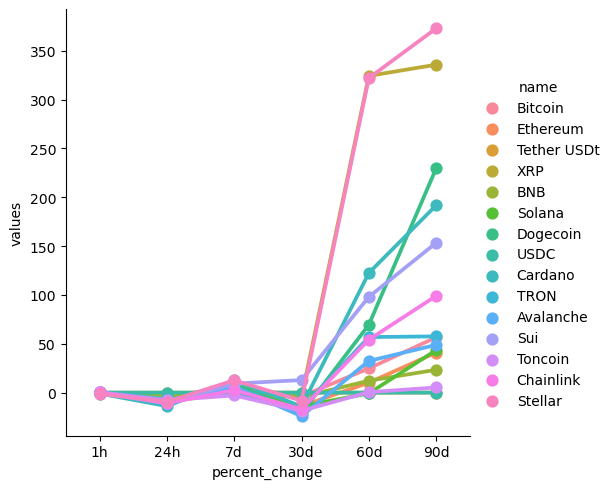

In [68]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [69]:
# To create a dataframe with the columns we want

df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,95035.40990,2025-01-08 15:48:53.222482


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

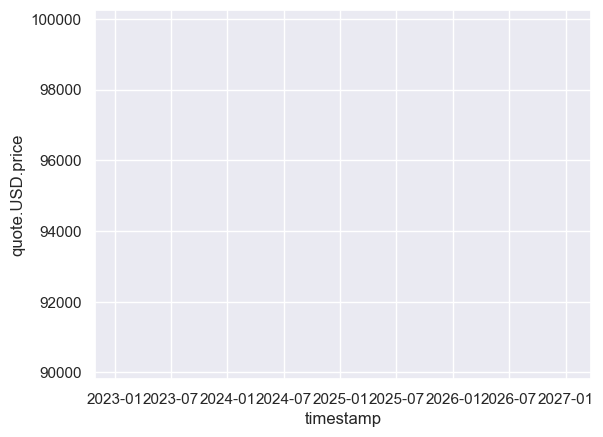

In [70]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)